In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Missing data 
Missing data occurs when values are simply absent or contain NaN (Not a Number) for any feature (column) in a given dataset. This will cause issues with many machinge learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithemetic computations
- Machine learning algoritms

**Common methods to deal with missing data:**
- Remove rows or columns with missing data
- Impute with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points

*Note: Domain knowledge is often needed to decide how to fill nulls.*



In [6]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,NaN,0.600632,NaN,NaN
1,NaN,NaN,NaN,NaN
2,2.394751,1.293249,0.149628,1.295757
3,0.326199,NaN,NaN,0.382626
4,NaN,NaN,NaN,1.065891
5,0.559338,0.270572,1.374689,0.931297
6,NaN,NaN,NaN,NaN
7,NaN,NaN,0.913114,NaN
8,0.608645,NaN,NaN,0.693466
9,NaN,1.009245,NaN,0.003360


In [8]:
copy = df.copy()
copy.drop(columns="C", inplace=True)

## dropna
Remove rows (default), or columns, containing null. 

**Parameters:**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to not drop   
- **subset** = only look for NaN in subset of columns (or rows)
- **axis** = index (default), or "columns"

In [17]:
copy.isna() # Shows not availeble (NaN)
copy.dropna(axis="columns", subset=2) 


,A,B,D
0,NaN,0.600632,NaN
1,NaN,NaN,NaN
2,2.394751,1.293249,1.295757
3,0.326199,NaN,0.382626
4,NaN,NaN,1.065891
5,0.559338,0.270572,0.931297
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,0.608645,NaN,0.693466
9,NaN,1.009245,0.003360


### fillna
Fill missing values.

In [35]:
copy = df.copy()
copy["A"].fillna(copy["A"].median(), inplace=True)
#copy["B"].mode()[0] # Mainly for categorical data 
copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate(inplace=True)
copy

,A,B,C,D
0,0.583991,0.600632,NaN,1.295757
1,0.583991,0.600632,NaN,1.295757
2,2.394751,1.293249,0.149628,1.295757
3,0.326199,1.293249,0.557981,0.382626
4,0.583991,1.293249,0.966335,1.065891
5,0.559338,0.270572,1.374689,0.931297
6,0.583991,0.270572,1.143901,0.693466
7,0.583991,0.270572,0.913114,0.693466
8,0.608645,0.270572,0.913114,0.693466
9,0.583991,1.009245,0.913114,0.003360


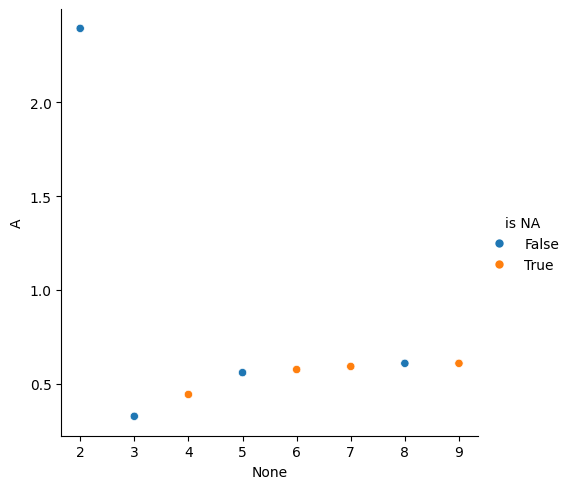

In [38]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].interpolate(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)